In [1]:
from pprint import pprint
from common import *
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('BankChurners.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
# Creating the High_Limit attribute
df['High_limit'] = df['Credit_Limit'].apply(lambda x: True if x > 20000 else False)

# Creating True or False columns from the Attrition flag for the churn column
df['Churn'] = df['Attrition_Flag'].apply(lambda x: True if x == 'Attrited Customer' else False)

training = df[['Customer_Age', 'Education_Level', 'Income_Category', 'High_limit', 'Churn']].copy()


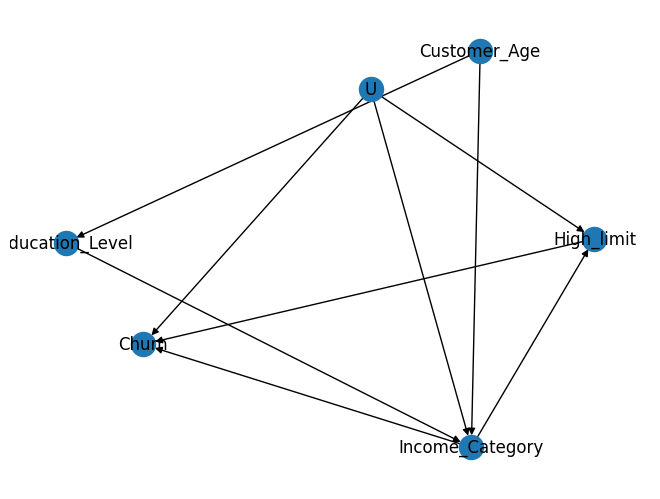

In [6]:
graph = nx.DiGraph()
graph.add_nodes_from(['Customer_Age', 'Education_Level', 'Income_Category', 'High_limit', 'Churn', 'U'])
graph.add_edges_from(edges(
    ['Customer_Age', ['Education_Level', 'Income_Category']],
    ['Education_Level', 'Income_Category', 'High_limit'],
    [['High_limit', 'Income_Category'], 'Churn'],
    ['U', ['Income_Category', 'High_limit', 'Churn']]
))
nx.draw_spring(graph, with_labels=True)
# plt.show()


In [13]:
causal_graph = to_gml(graph)
print(causal_graph)
causal_graph.replace("\n", " ").replace("  ", " ")

digraph {
  Customer_Age;
  Education_Level;
  Income_Category;
  High_limit;
  Churn;
  U;
  Customer_Age->Education_Level;
  Customer_Age->Income_Category;
  Education_Level->Income_Category;
  Income_Category->High_limit;
  Income_Category->Churn;
  High_limit->Churn;
  U->Income_Category;
  U->High_limit;
  U->Churn;
}


'digraph {  Customer_Age;  Education_Level;  Income_Category;  High_limit;  Churn;  U;  Customer_Age->Education_Level;  Customer_Age->Income_Category;  Education_Level->Income_Category;  Income_Category->High_limit;  Income_Category->Churn;  High_limit->Churn;  U->Income_Category;  U->High_limit;  U->Churn; }'

In [18]:
#Creating the
causal_graph = """digraph {
High_limit;
Churn;
Income_Category;
Education_Level;
Customer_Age;
U[label="Unobserved Confounders"];
Customer_Age -> Education_Level; Customer_Age -> Income_Category;
Education_Level -> Income_Category; Income_Category->High_limit;
U->Income_Category;U->High_limit;U->Churn;
High_limit->Churn; Income_Category -> Churn;
}
"""
causal_graph.replace("\n", " ")

'digraph { High_limit; Churn; Income_Category; Education_Level; Customer_Age; U[label="Unobserved Confounders"]; Customer_Age -> Education_Level; Customer_Age -> Income_Category; Education_Level -> Income_Category; Income_Category->High_limit; U->Income_Category;U->High_limit;U->Churn; High_limit->Churn; Income_Category -> Churn; } '

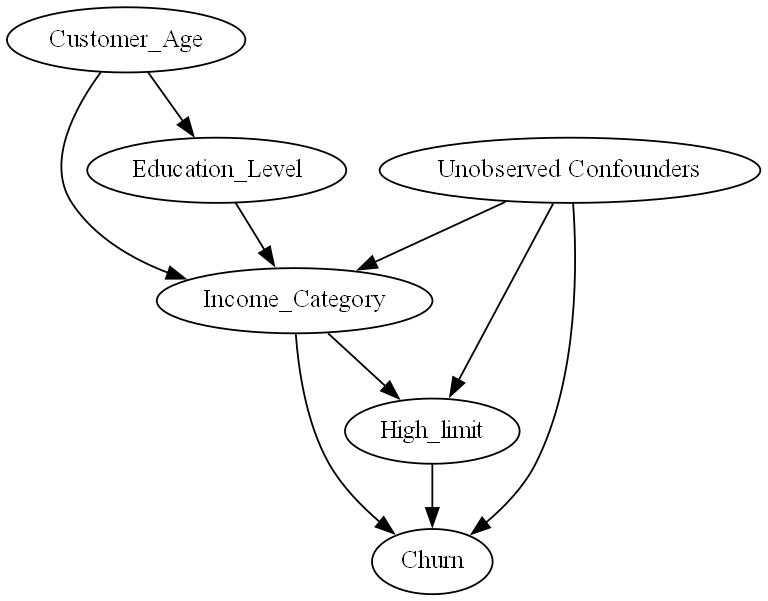

In [19]:
from dowhy import CausalModel
from IPython.display import Image, display

model = CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='High_limit',
        outcome='Churn')
model.view_model()
display(Image(filename="causal_model.png"))

In [20]:
#Identify the causal effect
estimands = model.identify_effect()
print(estimands)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

